<a href="https://colab.research.google.com/github/Noman-494/my_new/blob/main/Random_Forest.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [3]:
df=pd.read_csv('glass.csv')

In [4]:
df.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


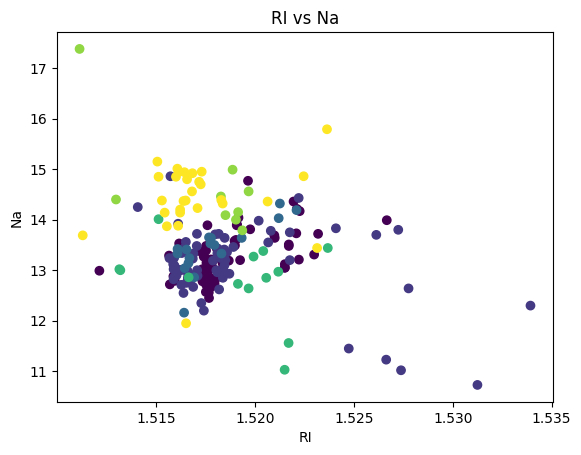

In [9]:

import matplotlib.pyplot as plt

# Example: Check linearity between RI and Na
plt.scatter(df['RI'], df['Na'],c=df['Type'],cmap='viridis')
plt.xlabel('RI')
plt.ylabel('Na')
plt.title('RI vs Na')
plt.show()


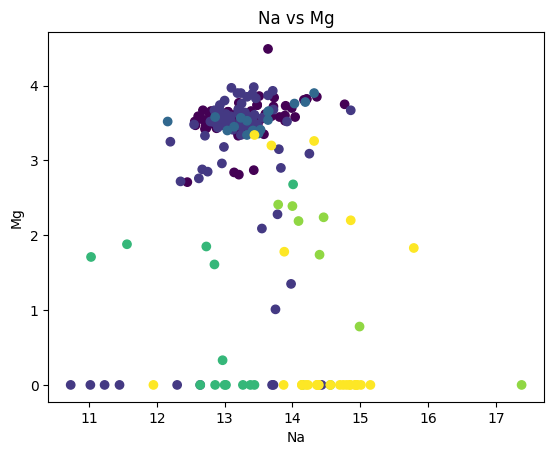

In [10]:
plt.scatter(df['Na'], df['Mg'],c=df['Type'],cmap='viridis')
plt.xlabel('Na')
plt.ylabel('Mg')
plt.title('Na vs Mg')
plt.show()


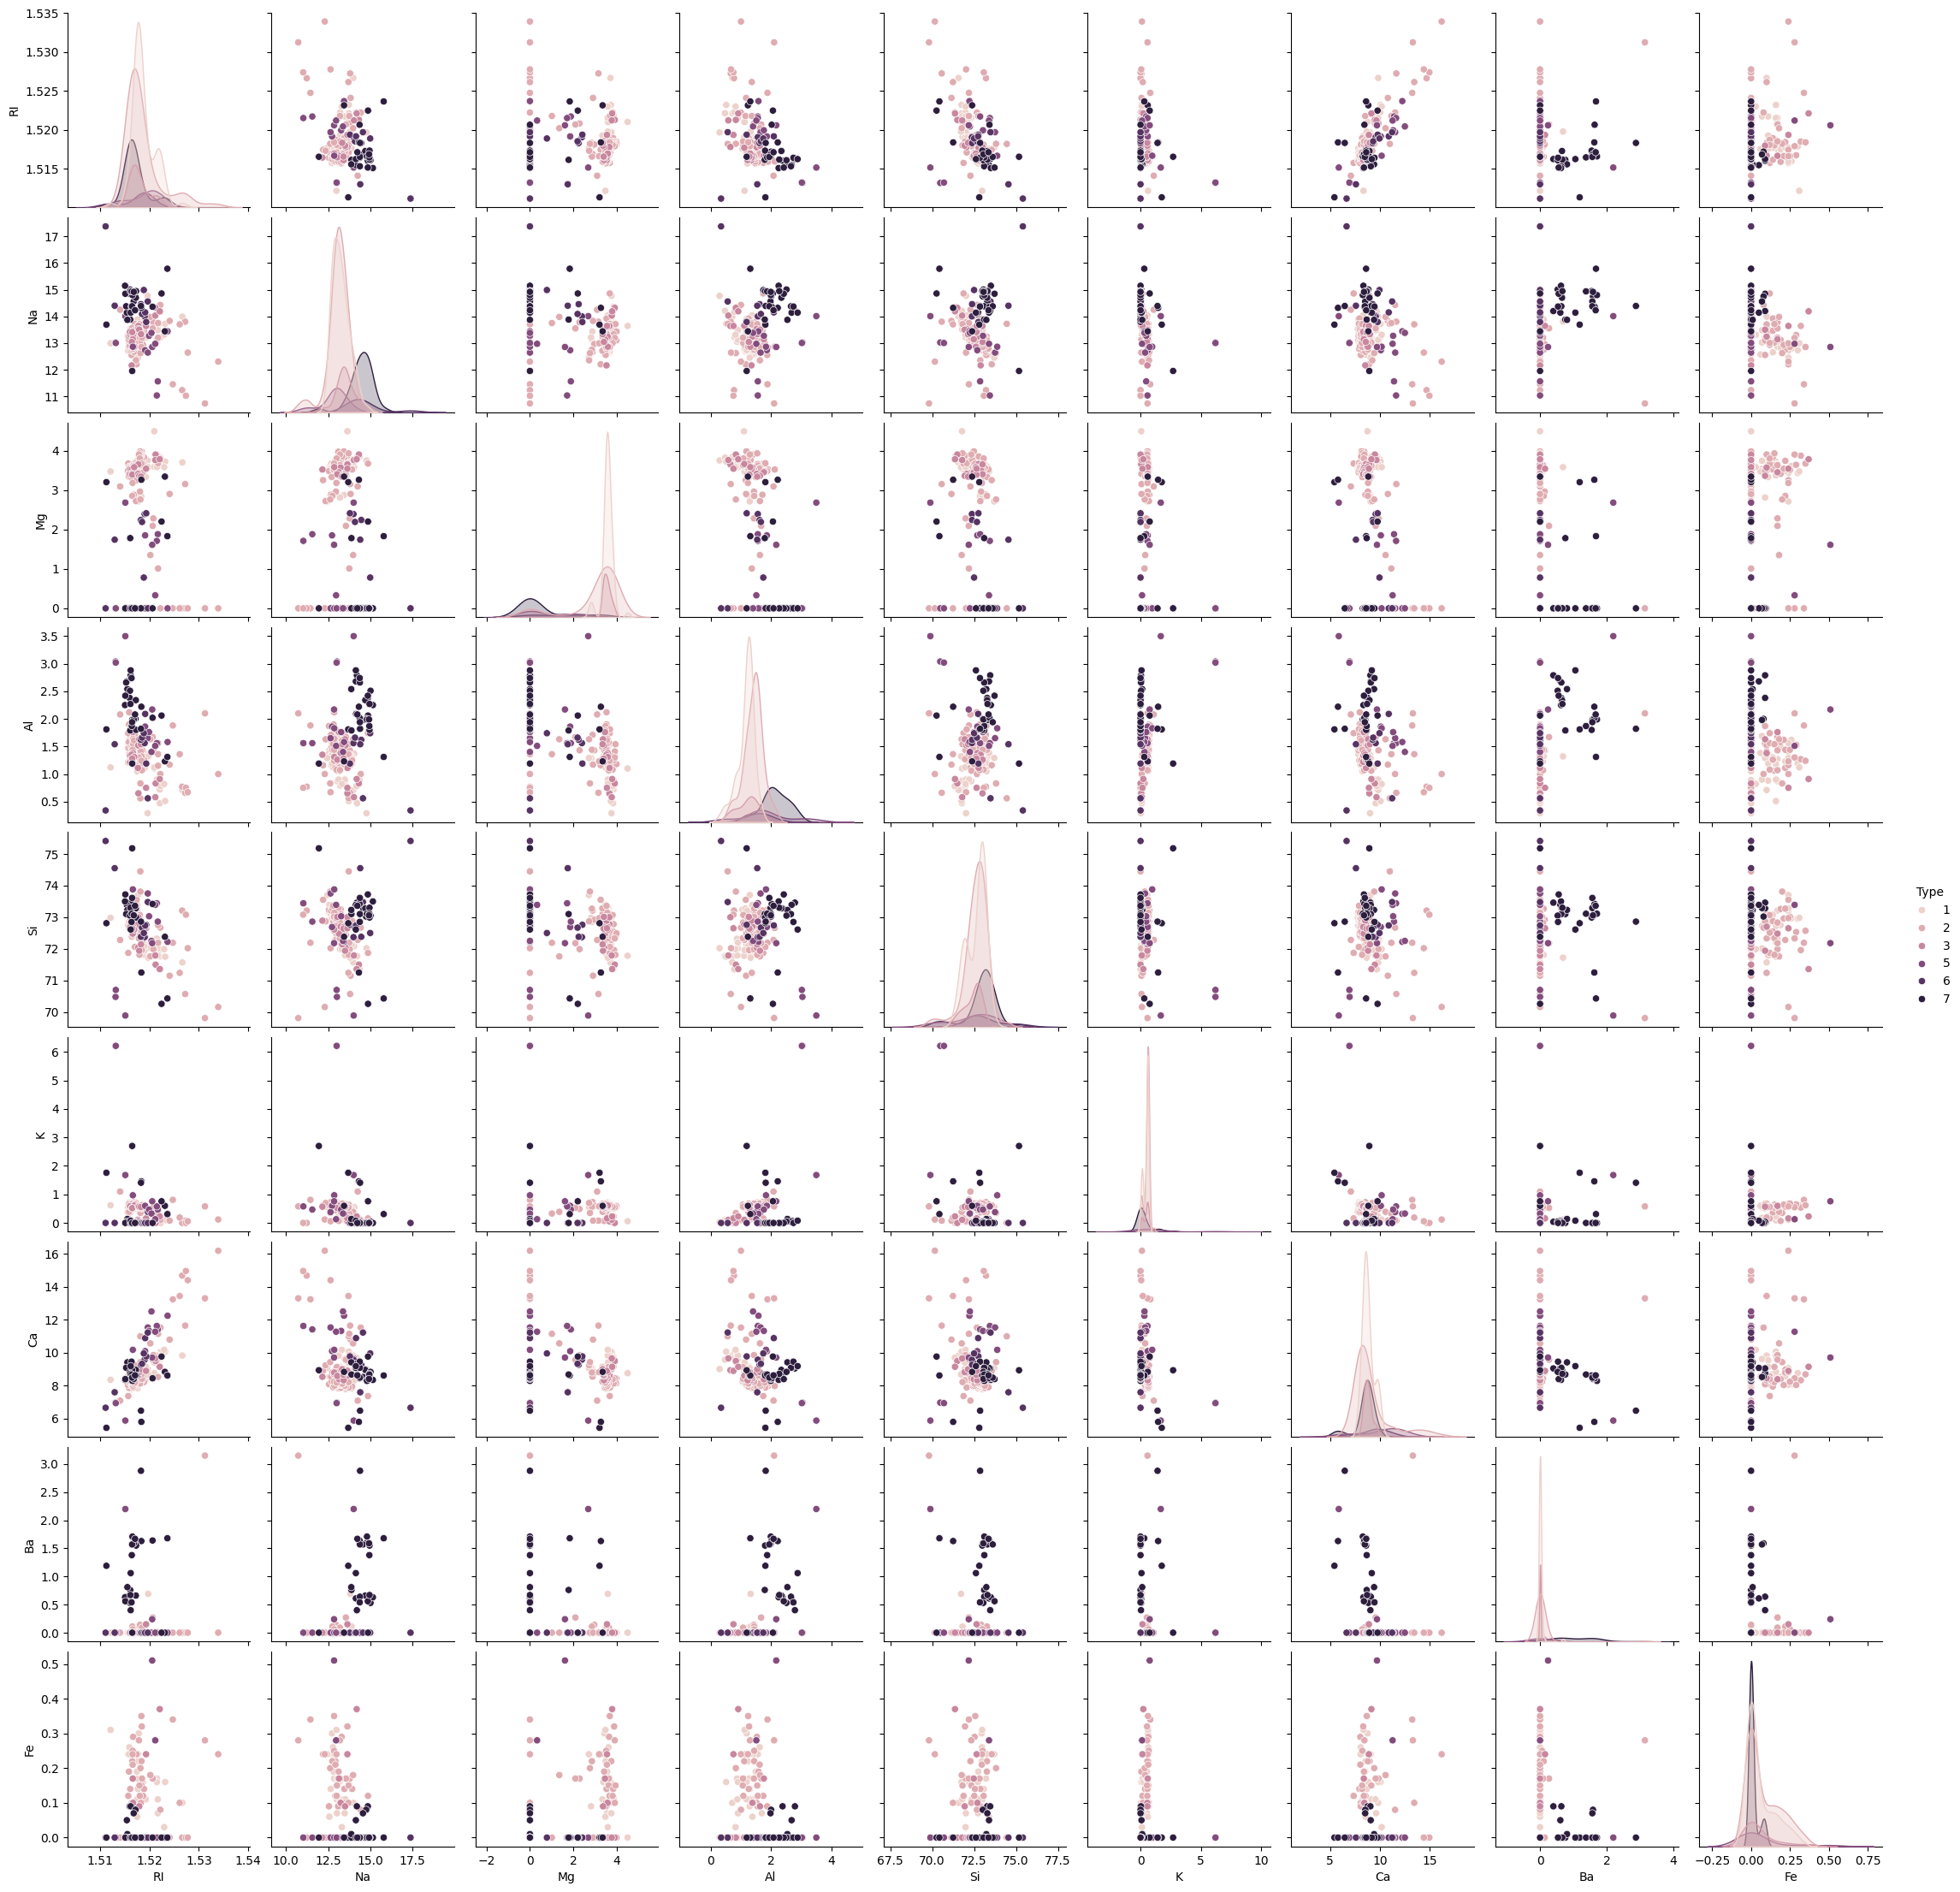

In [13]:
sns.pairplot(df,hue='Type')


Text(0.5, 1.0, 'Distribution of RI by Type')

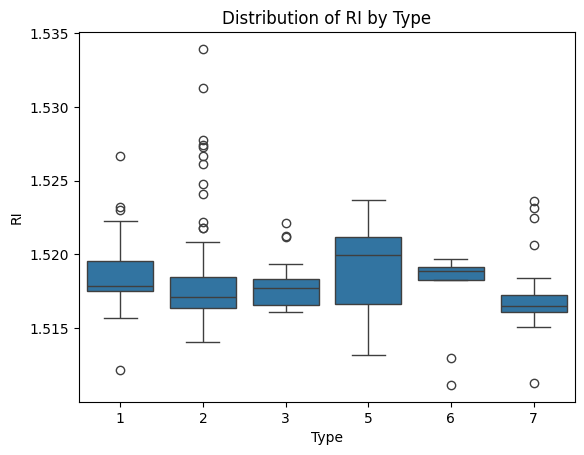

In [15]:
sns.boxplot(x='Type', y='RI', data=df)
plt.title('Distribution of RI by Type')


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [21]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2

In [17]:
X = df.drop('Type', axis=1)
y = df['Type']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [22]:
Scaler=MinMaxScaler()
X_train=Scaler.fit_transform(X_train)
X_test=Scaler.transform(X_test)

In [23]:
kbest = SelectKBest(chi2, k=5)
X_train = kbest.fit_transform(X_train, y_train)
X_test = kbest.transform(X_test)

In [24]:
model=RandomForestClassifier()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)


In [25]:
y_pred

array([7, 1, 2, 6, 5, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 7, 1, 2, 1, 2, 5, 1,
       7, 7, 1, 1, 7, 1, 2, 2, 1, 1, 2, 1, 1, 1, 1, 1, 1, 7, 7, 6, 2])

In [26]:
accuracy_score(y_test,y_pred)

0.6046511627906976

In [27]:
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.35      0.67      0.46         9
           2       0.67      0.53      0.59        19
           3       0.00      0.00      0.00         5
           5       1.00      1.00      1.00         2
           6       1.00      1.00      1.00         2
           7       0.86      1.00      0.92         6

    accuracy                           0.60        43
   macro avg       0.65      0.70      0.66        43
weighted avg       0.58      0.60      0.58        43

[[ 6  3  0  0  0  0]
 [ 8 10  0  0  0  1]
 [ 3  2  0  0  0  0]
 [ 0  0  0  2  0  0]
 [ 0  0  0  0  2  0]
 [ 0  0  0  0  0  6]]
0.6046511627906976


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [41]:
parameters={'n_estimators':[10,50,100,None],
            'max_depth':[3,5,7,None],
            'max_features':['sqrt','log2'],
            'min_samples_split':[2,4,6,8]}

In [42]:
grid_search=GridSearchCV(estimator=model,param_grid=parameters,scoring='accuracy',cv=5)


In [43]:
grid_search.fit(X_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:425: FitFailedWarning: 
160 fits failed out of a total of 640.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
160 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1145, in wrapper
    estimator._validate_params()
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 638, in _validate_params
    validate_parameter_constraints(
  File "/usr/local/lib/python3.10/dist-packages/sklearn/util

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [3, 5, 7, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 6, 8],
                         'n_estimators': [10, 50, 100, None]},
             scoring='accuracy')

In [44]:
 grid_search.best_score_


0.7484033613445378

In [45]:
grid_search.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_split': 6,
 'n_estimators': 50}

In [47]:
grid_search.best_estimator_

RandomForestClassifier(min_samples_split=6, n_estimators=50)

In [48]:
grid_search.best_index_

105

In [49]:
grid_search.scorer_

make_scorer(accuracy_score)

In [51]:
results_df=pd.DataFrame(grid_search.cv_results_)

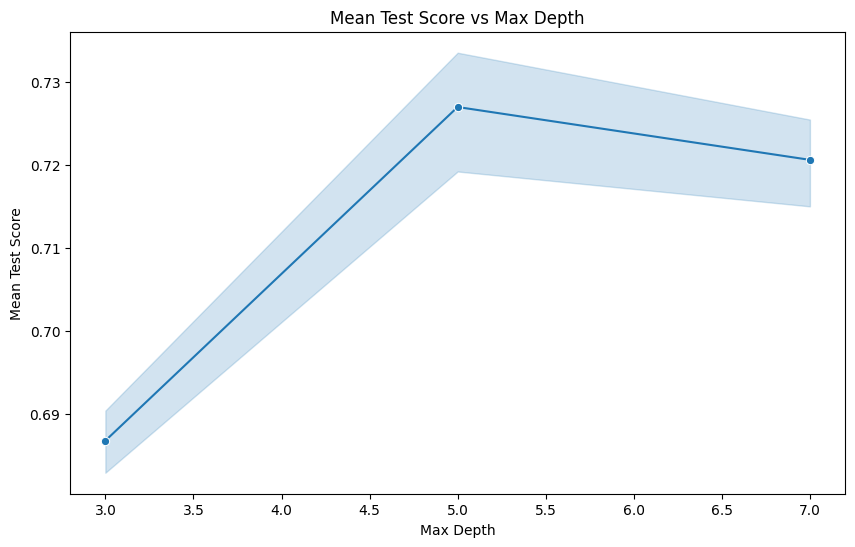

In [55]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='param_max_depth', y='mean_test_score', data=results_df   , marker='o')
plt.title('Mean Test Score vs Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Mean Test Score')
plt.show()


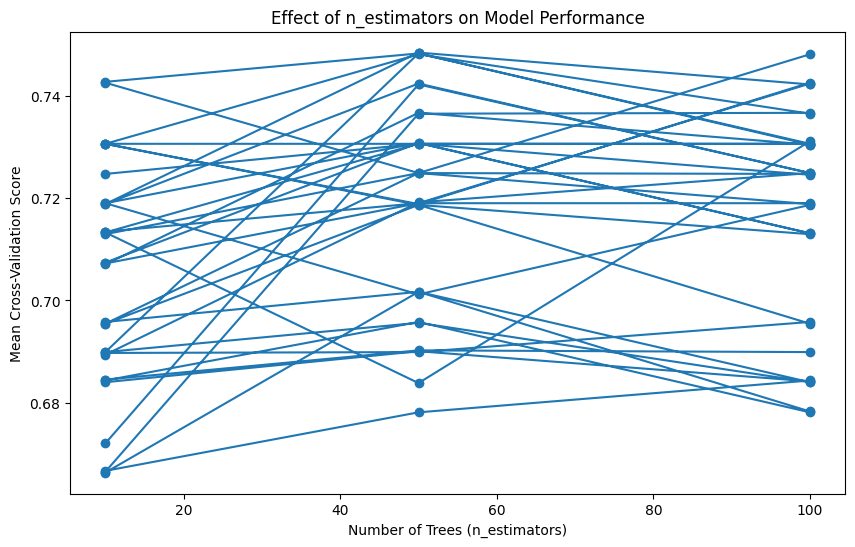

In [56]:



plt.figure(figsize=(10, 6))
plt.plot(results_df["param_n_estimators"], results_df["mean_test_score"], marker='o')
plt.xlabel("Number of Trees (n_estimators)")
plt.ylabel("Mean Cross-Validation Score")
plt.title("Effect of n_estimators on Model Performance")
plt.show()
